## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

### 미니프로젝트 안내
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>
* 1. 구별 버스정류장 분석.ipynb<br>
-- 1.1 bus_station_boarding.csv 파일을 활용하여 <span style="color:blue">서울시 내 각 구별 정류장, 노선수, 승하차 고객수를 분석</span>합니다.<br>
  그런데 bus_station_boarding.csv 파일에는 서울시와 경기도의 버스정류장이 모두 포함되어 있기 때문에<br>
  1.2 bus_station_seoul.csv의 정보를 추가로 활용하여 서울시 정류장만 골라내어 분석 대상에 포함시킵니다.<br><br>
* 2. 구별 이동인구 분석.ipynb<br>
-- 2. seoul_moving.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 이동 시간과 이동 인구를 분석</span>합니다.<br><br>
* 3. 구별 등록인구 분석.ipynb<br>
-- 3. seoul_people.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록인구를 분석</span>합니다. <br><br>
* 4. 구별 업종 분석.ipynb<br>
-- 4. business_type.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록업종을 분석</span>합니다.<br><br>
* 5. 데이터 분석.ipynb<br>
-- 위 1~4에서 도출한 데이터 프레임을 합쳐서 <span style="color:blue">서울시 내 어느 구에 버스 노선을 추가해야 할 지</span> 가설 수립 및 검증 과정을 거쳐 분석합니다.<br> (y값은 정류장 수 또는 노선 수)

---

# 1. 버스정류장 분석
### 버스정류장 데이터를 활용하여 서울시 내 각 구별 정류장 수, 노선 수, 승하차 고객수를 분석합니다.
### 이때, 서울시가 아닌 정류장 정보가 포함되어 있다면 이 정류장들을 제거하고 분석해야 합니다.

In [1]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 5.3 MB/s eta 0:00:02
   - -------------------------------------- 0.4/10.6 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.6 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 5.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.6 MB 6.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 7.4 MB

## 데이터 안내

[기본 데이터]
* 1.1 bus_station_boarding.csv 
* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_seoul.csv
* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.1. 데이터 불러오기

#### [1.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [3]:
import sys
import numpy as np
import pandas as pd

In [4]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station = pd.read_csv('./csv/1.1 bus_station_boarding.csv', sep=',', encoding='CP949')

In [5]:
# 데이터 프레임의 Shape을 확인합니다.
np.shape(bus_station)

(1169878, 8)

---

# 1.2. 기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [1.2.1] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.
* 데이터 중에서 컬럼명으로 봤을 때 int 이어야 할 것 같은데 object인 컬럼들이 있습니다. 왜 그런지 이 컬럼들을 더 분석해보세요.

In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [7]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [9]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503
1169877,20220430,201,201번(구리~서울역),06280,영휘원사거리.(구)홍릉사거리,122,49,20220503


#### [1.2.2] 버스정류장 위치를 구 별로 구분 하기

* tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [10]:
# 먼저, bus_station에서 버스정류장ARS번호의 정보를 확인해보세요.
bus_station['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [11]:
# 버스정류장 ARS 번호의 앞자리 2개를 잘라내어 새로 '자치구' 컬럼을 생성합니다
bus_station['자치구'] = bus_station['버스정류장ARS번호'].str[:2]

In [12]:
# 자치구의 값들이 어떻게 구성되어 있는 지 확인해봅니다. (ex: unique 활용)
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,06
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,06
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,06
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,06
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11


#### [1.2.3] 서울시 자치구에 해당하는 버스정류장만 추출하기

* 위에서 살펴본 자치구의 값은 숫자 2자리로 구성되어 있습니다. 
* 그런데 서울시 구별 코드정보는 01부터 25까지라고 합니다(도메인지식)
* 그렇다면 01부터 25의 범위를 넘어서는 데이터는 서울시 구별 정보가 아닐 것입니다. 이번 미니프로젝트에서는 서울시에 관한 정보만 분석하고자 하므로 이 데이터를 어떻게 처리하면 좋을지 생각하여 적용해보세요.
* 분석 시의 편의를 위해 숫자 2자리 구별 코드는 구 이름으로 변환해주세요.
* 서울시 구별 코드정보<br>
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'

In [13]:
# 숫자 2자리 구 코드를 구 이름으로 변환합니다
bus_station['자치구'] = bus_station['자치구'].map({'01': '종로구', '02': '중구', '03': '용산구', '04': '성동구', '05': '광진구', '06': '동대문구', '07': '중랑구', '08': '성북구', '09': '강북구', '10': '도봉구', '11': '노원구', '12': '은평구', '13': '서대문구', '14': '마포구', '15': '양천구', '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구', '21': '관악구', '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'})

In [14]:
# 숫자 2자리 구 코드를 구 이름으로 변환한 결과를 확인해봅니다.
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


In [15]:
# 자치구 컬럼의 값들을 확인해봅니다.
bus_station['자치구']

0          동대문구
1          동대문구
2          동대문구
3          동대문구
4           노원구
           ... 
1169873     은평구
1169874    동대문구
1169875     강서구
1169876     강동구
1169877    동대문구
Name: 자치구, Length: 1169878, dtype: object

#### [1.2.4] 결측치 처리

In [16]:
# NaN 값을 제거 합니다.
# 또는 위에서 처리한 방식에 따라 NaN 값이 없는 경우는 자치구 명으로 변환되지 않은 행(서울시 자치구에 해당하지 않는 정보)을 제거합니다
bus_station.dropna(inplace=True)


In [17]:
# NaN 값을 제거한 결과를 확인해봅니다. 결측치가 제가된 만큼 컬럼 갯수가 줄어들었는 지 확인해봅니다.
np.shape(bus_station)

(1064594, 9)

#### [1.2.5] 데이터 추가 분석 (버스정류장의 위치가 서울시인지 재확인)

* 위에서 버스정류장ARS번호의 앞 2자리로 서울시 자치구에 속한 버스정류장만 추출했습니다. 
* 그런데 이렇게 추출한 버스정류장도 서울시에 속하지 않는 경우가 있어, 추가 데이터를 활용하여 한번 더 서울시 정류장만 추출하려고 합니다.

In [18]:
# 자치구 별로 정류장의 개수를 확인해봅니다. (nunique로 고유값의 갯수만 확인)
bus_station['자치구'].unique()

array(['동대문구', '노원구', '강북구', '종로구', '마포구', '서대문구', '성동구', '서초구', '동작구',
       '관악구', '영등포구', '금천구', '용산구', '중구', '성북구', '구로구', '광진구', '도봉구',
       '은평구', '중랑구', '강서구', '양천구', '강남구', '강동구', '송파구'], dtype=object)

In [19]:
# 강남구와 서초구에 500개가 넘는 버스정류장이 있습니다. 
# 이 중에 랜덤으로 몇 개를 골라 해당 자치구의 정류장이 맞는 지 확인해 보고자 합니다.
# 강남구의 버스정류장ARS번호 전체값을 출력해, 강남구의 버스정류장ARS번호 하나를 조사(네이버 지도에서 버스정류장 검색)해봅니다.
bus_station.loc[bus_station['자치구']=='강남구', '버스정류장ARS번호']

897        23783
904        23081
905        23074
923        23062
1020       23045
           ...  
1169835    23223
1169842    23216
1169850    23189
1169861    23290
1169865    23187
Name: 버스정류장ARS번호, Length: 62571, dtype: object

#### 여기서 잠깐!

* 예를 들어 강남구 정류장 중 하나인 23081 정류장을 네이버지도에서 버스정류장 검색을 해보면 강남구가 아니라 남양주에 위치해 있습니다. 
* 이것은 2015년경 버스 노선을 정리 하면서 서울에서 경기도까지 이어지는 노선들의 버스정류장 ARS번호에 서울시 코드를 부여하여 생긴 현상입니다.(도메인지식) 
* 하지만 우리는 서울시 내의 데이터가 필요하므로 적절한 조치가 필요합니다.

#### [1.2.6] 추가 csv 파일로 서울시 버스정류장만 추출하기
* 위에서 작업한 bus_station 데이터와 서울의 버스 정류장 데이터를 merge하는 방법을 활용해 봅니다.
* 서울의 버스 정류장만 포함하고 있는 csv 파일은 아래와 같이 제공됩니다.
* 파일명: 1.2 bus_station_seoul.csv
* 출처: https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (서울 열린데이터 광장)

In [20]:
# 데이터 로딩 (1.2 bus_station_seoul.csv 의 데이터를 불러와서 only_seoul 변수에 저장합니다)
# 데이터 로딩 시 오류가 발생하는 경우 검색 등을 통해 encoding 값을 적용해보세요.
only_seoul = pd.read_csv('./csv/1.2 bus_station_seoul.csv')

In [21]:
# 서울의 버스정류장 데이터의 정보 확인
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [22]:
# 데이터 살펴보기
only_seoul.head()

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [23]:
# 위에서 네이버 지도로 확인했던 강남구 정류장ARS번호 23081이 이 데이터프레임에 있는지 찾아봅니다.
only_seoul.loc[only_seoul['ARS-ID']=='23081']

,ARS-ID,정류소명


In [24]:
# bus_station과 only_seoul 데이터를 합치기 전에 버스정류장ARS번호의 type을 변경합니다. 
# 어떤 type으로 변경해야 할 지 생각해보세요
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)

In [25]:
# 두 데이터를 합치기 전에 데이터의 컬럼명을 변경합니다. (버스정류장ARS번호로 맞춥니다.)
only_seoul.rename(columns={'ARS-ID': '버스정류장ARS번호'}, inplace=True)

In [26]:
# bus_station과 only_seoul 데이터를 merge 해봅니다.
data = pd.merge(bus_station, only_seoul)

In [27]:
# bus_station과 only_seoul 데이터를 merge한 결과를 확인해봅니다.
data.head(30)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,정류소명
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구,장안동삼성쉐르빌아파트
1,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,75,197,20220404,동대문구,장안동삼성쉐르빌아파트
2,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,21,245,20220404,동대문구,장안동삼성쉐르빌아파트
3,20220401,2416,2416번(중랑공영차고지~삼성역),6243,장안동삼성쉐르빌아파트,42,268,20220404,동대문구,장안동삼성쉐르빌아파트
4,20220402,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,12,127,20220405,동대문구,장안동삼성쉐르빌아파트
5,20220402,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,41,112,20220405,동대문구,장안동삼성쉐르빌아파트
6,20220402,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,35,158,20220405,동대문구,장안동삼성쉐르빌아파트
7,20220402,2416,2416번(중랑공영차고지~삼성역),6243,장안동삼성쉐르빌아파트,41,173,20220405,동대문구,장안동삼성쉐르빌아파트
8,20220403,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,19,123,20220406,동대문구,장안동삼성쉐르빌아파트
9,20220403,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,37,101,20220406,동대문구,장안동삼성쉐르빌아파트


In [28]:
# 버스정류장ARS번호 갯수를 확인해봅니다.
np.shape(data)

(1060886, 10)

#### [1.2.7] 구 별로 버스 정류장의 개수 확인

In [29]:
# 구 별로 버스 정류장의 개수를 확인해 봅니다.
# 구 별 버스정류장 개수로 구성된 데이터프레임을 seoul_bus_station_ARS에 저장합니다.(groupby 함수에서 as_index 옵션을 사용해보세요)
seoul_bus_station_ARS = data.groupby('자치구')['버스정류장ARS번호'].nunique().reset_index(name='정류장개수')
print(seoul_bus_station_ARS)

     자치구  정류장개수
0    강남구    499
1    강동구    369
2    강북구    413
3    강서구    566
4    관악구    466
5    광진구    269
6    구로구    486
7    금천구    345
8    노원구    514
9    도봉구    359
10  동대문구    306
11   동작구    438
12   마포구    562
13  서대문구    456
14   서초구    600
15   성동구    435
16   성북구    602
17   송파구    415
18   양천구    319
19  영등포구    465
20   용산구    323
21   은평구    501
22   종로구    349
23    중구    178
24   중랑구    380


#### [1.2.8] 구 별로 버스 노선이 몇 개 지나가는 지 확인
* 구 별로 버스 노선의 개수 확인

In [30]:
# 구 별로 버스 노선 개수를 확인해 봅니다.
# 구 별 버스 노선 개수로 구성된 데이터프레임을 seoul_bus_station_line에 저장합니다.
seoul_bus_station_line = data.groupby('자치구')['노선번호'].nunique().reset_index(name='노선개수')
print(seoul_bus_station_line)

     자치구  노선개수
0    강남구    91
1    강동구    21
2    강북구    67
3    강서구    49
4    관악구    86
5    광진구    41
6    구로구    79
7    금천구    58
8    노원구    57
9    도봉구    46
10  동대문구    73
11   동작구    94
12   마포구    97
13  서대문구   107
14   서초구    93
15   성동구    58
16   성북구    99
17   송파구    55
18   양천구    56
19  영등포구   101
20   용산구    67
21   은평구    71
22   종로구   106
23    중구   103
24   중랑구    48


#### [1.2.9] 구 별로 승차 총 승객수, 하차 총 승객수 확인

In [31]:
# 구 별 승차총승객수, 하차총승객수를 확인해봅니다.
# 구 별 승차총승객수, 하차총승객수로 구성된 데이터프레임을 seoul_bus_station_sum에 저장합니다.
seoul_bus_station_sum = data.groupby('자치구', as_index=False)[['승차총승객수', '하차총승객수']].sum()
print(seoul_bus_station_sum)

     자치구   승차총승객수   하차총승객수
0    강남구  8030483  7569213
1    강동구  2890053  2830506
2    강북구  4825181  4671783
3    강서구  4681083  4652828
4    관악구  7655819  7792476
5    광진구  2749448  2753411
6    구로구  4942197  4730992
7    금천구  3776658  3581930
8    노원구  4353295  4292724
9    도봉구  3304305  3211421
10  동대문구  5240565  5115379
11   동작구  5314274  5112276
12   마포구  5088461  4957596
13  서대문구  5863499  5796960
14   서초구  7221330  6977950
15   성동구  2807280  2746738
16   성북구  6236424  6231238
17   송파구  5641742  5603488
18   양천구  4009172  3851173
19  영등포구  5739875  5783211
20   용산구  4189977  4086474
21   은평구  5201660  5122499
22   종로구  5468935  5205394
23    중구  3776675  3598932
24   중랑구  3792541  3740923


#### [1.2.10] 구 별로 승차 평균 승객수, 하차 평균 승객수 확인

In [32]:
# 구 별 승차 승객수, 하차 승객수의 평균을 확인해봅니다.
# 구 별 승차 승객수, 하차 승객수의 평균으로 구성된 데이터프레임을 seoul_bus_station_mean에 저장합니다.
# 컬럼명은 승차평균승객수, 하차평균승객수로 바꾸세요.
seoul_bus_station_mean = data.groupby('자치구', as_index=False)[['승차총승객수', '하차총승객수']].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수': '승차평균승객수', '하차총승객수': '하차평균승객수'}, inplace=True)
print(seoul_bus_station_mean)

     자치구     승차평균승객수     하차평균승객수
0    강남구  128.767927  121.371512
1    강동구   99.161194   97.118065
2    강북구  133.020373  128.791504
3    강서구   88.119480   87.587591
4    관악구  154.753674  157.516040
5    광진구  118.352546  118.523137
6    구로구  119.235615  114.140076
7    금천구  123.098370  116.751304
8    노원구   88.476211   87.245168
9    도봉구  106.859356  103.855540
10  동대문구  131.841430  128.692017
11   동작구  124.295965  119.571419
12   마포구  103.907639  101.235343
13  서대문구  109.914502  108.667192
14   서초구  126.687777  122.418028
15   성동구   96.377369   94.298888
16   성북구  123.251922  123.149430
17   송파구  114.270072  113.495260
18   양천구   97.627526   93.780086
19  영등포구  120.337855  121.246404
20   용산구  137.891694  134.485421
21   은평구  106.395173  104.776007
22   종로구  131.889620  125.534028
23    중구  121.020124  115.324511
24   중랑구   87.403863   86.214261


#### [1.2.11] 데이터 프레임 합치기

In [33]:
# 4개의 데이터 프레임을 합쳐서 seoul_bus_station에 저장해보세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

seoul_bus_station = pd.merge(pd.merge(pd.merge(seoul_bus_station_ARS, seoul_bus_station_line), seoul_bus_station_sum), seoul_bus_station_mean)

In [34]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경하세요.
seoul_bus_station

,자치구,정류장개수,노선개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [35]:
# 데이터 프레임을 합친 결과 확인


In [36]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station.to_csv('csv/df_seoul_bus_station.csv', index=False)

---

# 1.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### [1.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

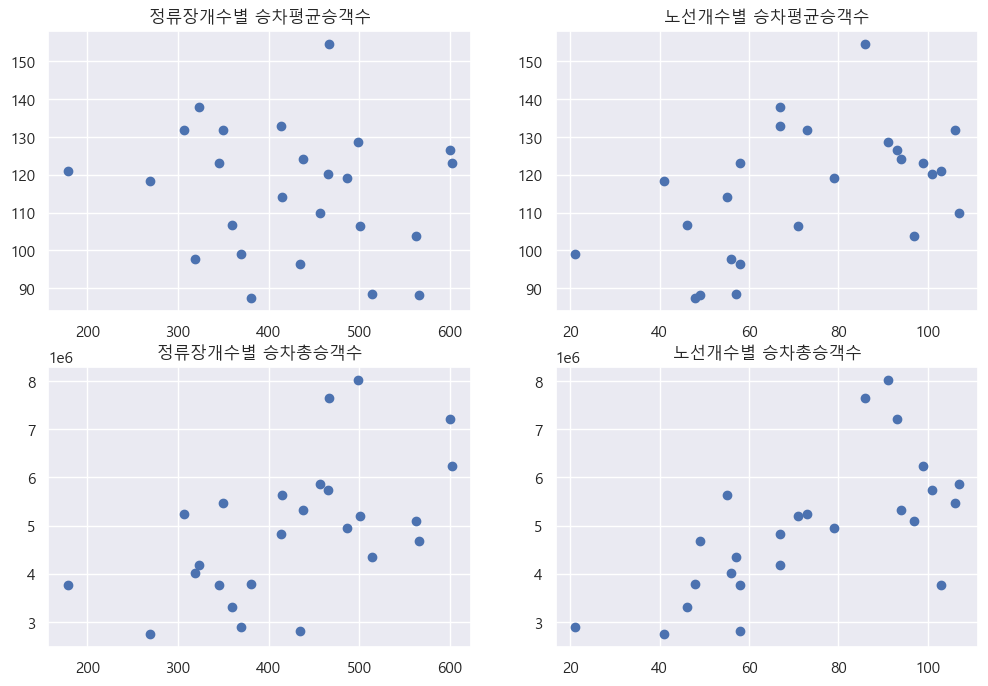

In [38]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter('정류장개수', '승차평균승객수', data=seoul_bus_station)
plt.title('정류장개수별 승차평균승객수')

plt.subplot(2, 2, 2)
plt.scatter('노선개수', '승차평균승객수', data=seoul_bus_station)
plt.title('노선개수별 승차평균승객수')

plt.subplot(2, 2, 3)
plt.scatter('정류장개수', '승차총승객수', data=seoul_bus_station)
plt.title('정류장개수별 승차총승객수')

plt.subplot(2, 2, 4)
plt.scatter('노선개수', '승차총승객수', data=seoul_bus_station)
plt.title('노선개수별 승차총승객수')

plt.show()

In [105]:
# 아래에 코드를 작성하고 결과를 확인합니다.
print(spst.pearsonr(seoul_bus_station['노선개수'], seoul_bus_station['승차평균승객수']))
print(spst.pearsonr(seoul_bus_station['노선개수'], seoul_bus_station['하차평균승객수']))
print(spst.pearsonr(seoul_bus_station['노선개수'], seoul_bus_station['승차총승객수']))
print(spst.pearsonr(seoul_bus_station['노선개수'], seoul_bus_station['하차총승객수']))

print(spst.pearsonr(seoul_bus_station['정류장개수'], seoul_bus_station['승차총승객수']))
print(spst.pearsonr(seoul_bus_station['정류장개수'], seoul_bus_station['하차총승객수']))

PearsonRResult(statistic=0.49354079092741227, pvalue=0.012170019218131677)
PearsonRResult(statistic=0.4704401254149343, pvalue=0.017632441540646512)
PearsonRResult(statistic=0.6654877832095705, pvalue=0.0002830862285771963)
PearsonRResult(statistic=0.6526422720355217, pvalue=0.00040610118937178363)
PearsonRResult(statistic=0.5666813370974586, pvalue=0.003141977397117317)
PearsonRResult(statistic=0.5784790149467576, pvalue=0.002451833203453864)


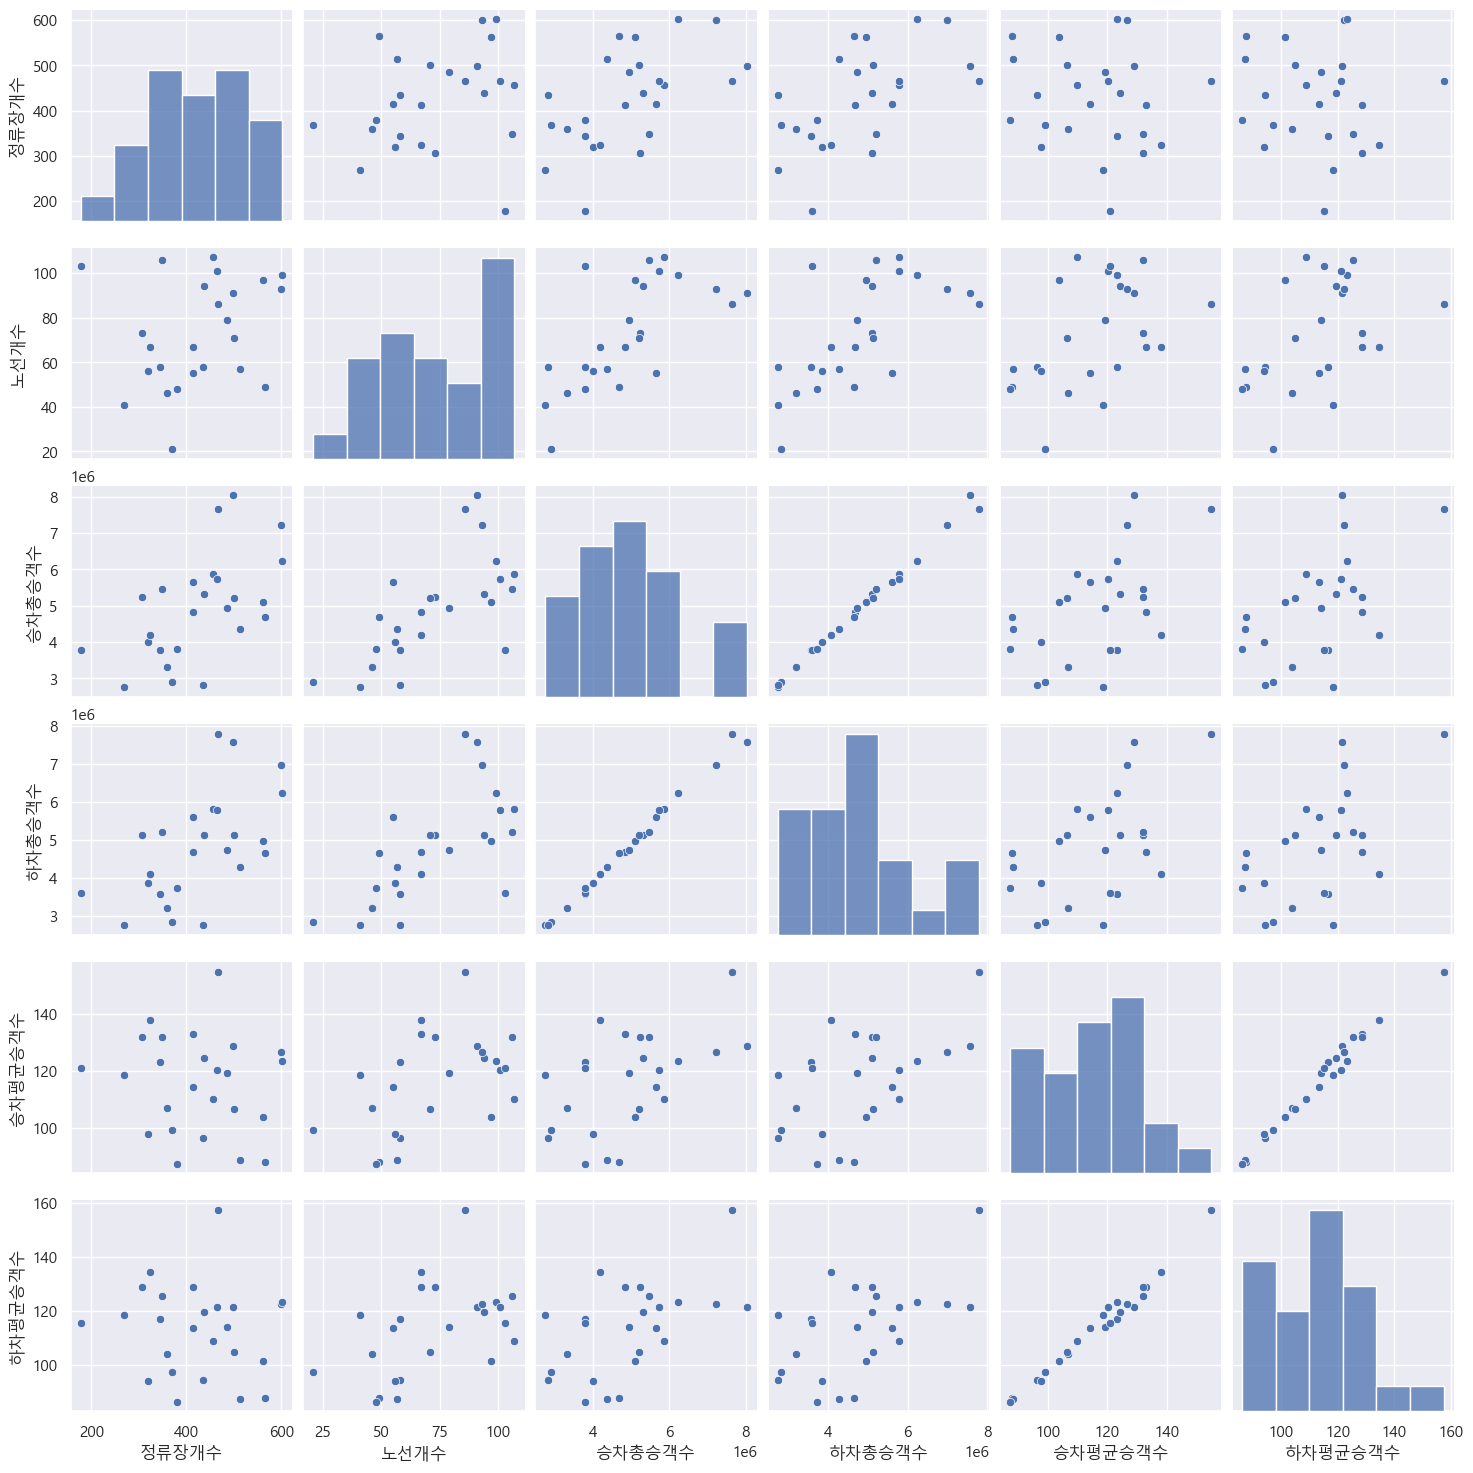

In [98]:
sns.pairplot(seoul_bus_station)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 노선개수가 증가할수록 승차/하차평균승객수가 증가하는 경향이 있다. (중간정도 관계)
# 2. 노선개수가 증가할수록 승차/하차총승객수가 증가하는 경향이 있다. (높은 관계)
# 3.정류장개수와 승차/하차평균승객수는 관계가 없다고 볼 수 있음 다만! 승차/하차총승객수와는 관련 있음 (높음)

---